In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
img = cv2.imread('./dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
img.shape

(1024, 683, 3)

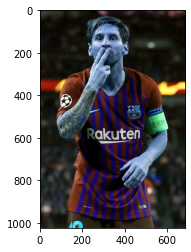

In [35]:
plt.imshow(img)

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 683)

In [37]:
gray

array([[52, 51, 51, ..., 60, 60, 60],
       [53, 52, 52, ..., 55, 55, 55],
       [53, 53, 52, ..., 49, 49, 49],
       ...,
       [28, 29, 31, ..., 35, 35, 35],
       [28, 30, 31, ..., 34, 34, 34],
       [28, 30, 31, ..., 36, 36, 36]], dtype=uint8)

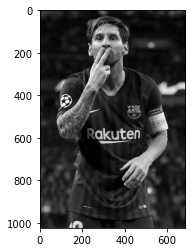

In [38]:
plt.imshow(gray, cmap='gray')

In [39]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.5, 5)
faces

array([[218,  59, 182, 182]], dtype=int32)

In [40]:
(x,y,w,h) = faces[0]
x,y,w,h

(218, 59, 182, 182)

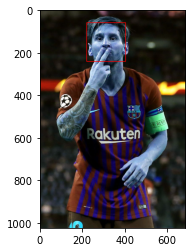

In [41]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

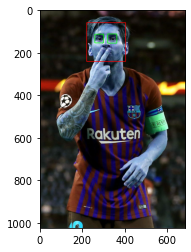

In [42]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

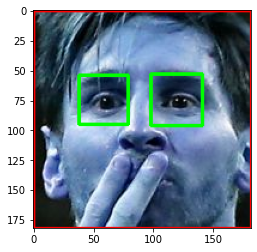

In [43]:
plt.imshow(roi_color, cmap='gray')

In [23]:
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
        

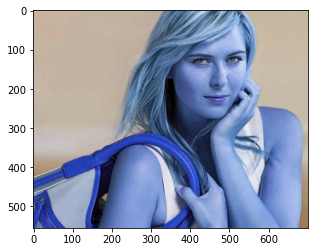

In [30]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

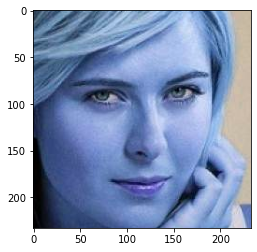

In [32]:
cropped_image = get_cropped_img_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [33]:
test2_image = get_cropped_img_if_2_eyes('./test_images/sharapova2.JPG')
test2_image

In [56]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [57]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [58]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [62]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder......", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

cropped
lionel_messi
Generating folder...... ./dataset/cropped/lionel_messi
maria_sharapova
Generating folder...... ./dataset/cropped/maria_sharapova
roger_federer
Generating folder...... ./dataset/cropped/roger_federer
serena_williams
Generating folder...... ./dataset/cropped/serena_williams
virat_kohli
Generating folder...... ./dataset/cropped/virat_kohli
